___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [83]:
df0 = pd.read_csv("final_scout_not_dummy2.csv")
df = df0.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   price                        15909 non-null  int64  
 3   km                           15909 non-null  float64
 4   Type                         15909 non-null  object 
 5   Fuel                         15909 non-null  object 
 6   Extras                       15909 non-null  object 
 7   Gears                        15909 non-null  float64
 8   age                          15909 non-null  float64
 9   Previous_Owners              15909 non-null  float64
 10  hp_kW                        15909 non-null  float64
 11  Inspection_new               15909 non-null  int64  
 12  Paint_Type                   15909 non-null  object 
 13  Upholstery_type 

In [84]:
df.head()

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,"Alloy wheels, Catalytic Converter, Voice Control",7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,"Alloy wheels, Sport seats, Sport suspension, V...",7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.0,Used,Diesel,"Alloy wheels, Voice Control",7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.0,Used,Diesel,"Alloy wheels, Sport seats, Voice Control",6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.0,Used,Diesel,"Alloy wheels, Sport package, Sport suspension,...",7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package


In [85]:
df.sample(10)

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
4988,Audi A3,Sedans,23900,1647.362609,New,Benzine,"Alloy wheels, Shift paddles",7.0,0.0,1.0,85.0,1,Metallic,Cloth,Automatic,999.0,1280.0,front,5.2,118.0,Premium,Standard,Safety Premium Package
1215,Audi A1,Sedans,15880,21000.000000,Used,Benzine,"Alloy wheels, Catalytic Converter, Roof rack, ...",5.0,2.0,1.0,70.0,1,Metallic,Part/Full Leather,Manual,999.0,1135.0,front,4.2,97.0,Standard,Plus,Safety Premium Package
10268,Opel Corsa,Compact,10689,10.000000,Pre-registered,Benzine,Alloy wheels,5.0,0.0,1.0,51.0,1,Metallic,Cloth,Manual,1229.0,1163.0,front,5.8,134.0,Standard,Plus,Safety Premium Package
8888,Opel Corsa,Sedans,13990,50.000000,Pre-registered,Benzine,"Alloy wheels, Touch screen",5.0,1.0,1.0,66.0,0,Metallic,Cloth,Semi-automatic,1398.0,1163.0,front,4.8,112.0,Premium,Plus,Safety Premium Package
8603,Opel Corsa,Sedans,7180,69943.000000,Used,Benzine,"Alloy wheels, Voice Control",5.0,2.0,1.0,52.0,0,Metallic,Cloth,Manual,1229.0,1163.0,front,5.3,124.0,Standard,Plus,Safety Premium Plus Package
15675,Renault Espace,Van,38960,15101.000000,Used,Diesel,Alloy wheels,6.0,1.0,1.0,118.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1659.0,front,4.7,120.0,Standard,Standard,Safety Premium Package
909,Audi A1,Sedans,14500,20000.000000,Used,Diesel,Alloy wheels,5.0,2.0,1.0,85.0,0,Metallic,Cloth,Manual,1598.0,1250.0,front,3.7,97.0,Standard,Plus,Safety Premium Package
5920,Opel Astra,Sedans,14800,51586.000000,Used,Benzine,"Alloy wheels, Touch screen",5.0,2.0,1.0,78.0,0,Metallic,Cloth,Automatic,999.0,1364.0,front,4.4,102.0,Standard,Plus,Safety Premium Package
11252,Opel Insignia,Station wagon,15909,20346.000000,Used,Diesel,Alloy wheels,6.0,2.0,1.0,100.0,0,Metallic,Cloth,Manual,1598.0,1701.0,front,4.1,109.0,Standard,Standard,Safety Premium Package
9942,Opel Corsa,Compact,16690,10.000000,Pre-registered,Benzine,"Alloy wheels, Catalytic Converter",6.0,0.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1163.0,front,6.3,143.0,Premium,Plus,Safety Premium Package


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

### Converting the Extras feature from object to numeric

In [86]:
df["Extras"] = df.Extras.str.count(",") + 1
df.Extras

0        3
1        4
2        2
3        3
4        4
        ..
15904    2
15905    3
15906    1
15907    2
15908    2
Name: Extras, Length: 15909, dtype: int64

In [87]:
df.Extras.sample(10)

13926    1
5262     3
13789    2
10971    1
9290     1
6871     1
901      2
13136    1
11865    1
5482     3
Name: Extras, dtype: int64

In [88]:
df.Extras.value_counts()


1     7009
2     3391
3     2684
4     1404
5      743
6      409
7      174
8       60
9       28
10       7
Name: Extras, dtype: int64

## multicollinearity control

In [89]:
df.corr()

,price,km,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
price,1.000000,-0.399443,0.251408,0.530563,-0.473689,-0.144672,0.696532,0.008508,0.282075,0.468264,0.301448,0.347668
km,-0.399443,1.000000,0.018517,-0.033087,0.758370,0.157039,0.004170,-0.049485,0.306792,0.147246,-0.345228,-0.227640
Extras,0.251408,0.018517,1.000000,0.225728,-0.025736,0.013290,0.354481,0.151168,0.215360,0.149501,0.178099,0.225946
Gears,0.530563,-0.033087,0.225728,1.000000,-0.064507,-0.036594,0.449680,-0.011026,0.339431,0.334002,0.011357,0.106674
age,-0.473689,0.758370,-0.025736,-0.064507,1.000000,0.316166,-0.083334,-0.045467,0.215304,0.065081,-0.371941,-0.288236
Previous_Owners,-0.144672,0.157039,0.013290,-0.036594,0.316166,1.000000,-0.022535,0.019519,0.027961,0.003460,-0.022799,-0.030866
hp_kW,0.696532,0.004170,0.354481,0.449680,-0.083334,-0.022535,1.000000,0.036740,0.597708,0.638395,0.403492,0.522772
Inspection_new,0.008508,-0.049485,0.151168,-0.011026,-0.045467,0.019519,0.036740,1.000000,-0.025975,-0.035456,0.154669,0.134247
Displacement_cc,0.282075,0.306792,0.215360,0.339431,0.215304,0.027961,0.597708,-0.025975,1.000000,0.563594,0.004314,0.288515
Weight_kg,0.468264,0.147246,0.149501,0.334002,0.065081,0.003460,0.638395,-0.035456,0.563594,1.000000,0.105840,0.298414


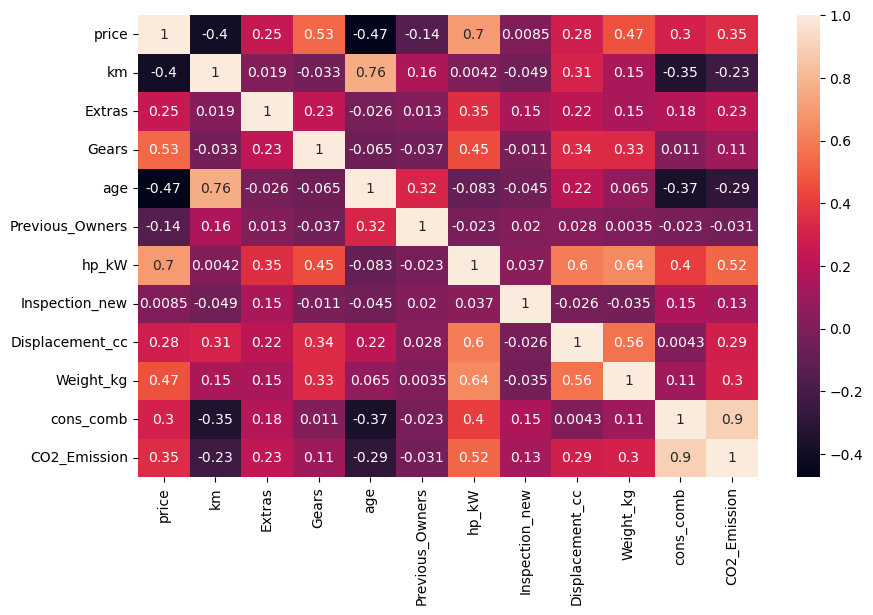

In [90]:
sns.heatmap(data = df.corr(), annot=True);

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X = df.drop(columns = "price", axis =1)
y = df["price"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

## OneHotEncoder

### Example

OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally, we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.

We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege, categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.

However, when converting to categorical data, the following should not be forgotten: **if there is a hierarchical superiority or ranking (expensive, normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used.** 

Conversion of categorical data to dummies features is done according to the unique categorical data in the train set where the fit process is performed.

With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".

If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [94]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")


In [95]:
df.head(2)

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.0,Used,Diesel,3,7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.0,Used,Benzine,4,7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package


onehotencoder: "make_model", "body_type", "Type", "Fuel", "Paint_Type", "Upholstery_type", "Gearing_Type", "Drive_chain"


ordinal : "Comfort_Convenience_Package", "Entertainment_Media_Package", "Safety_Security_Package"

In [96]:
df.Comfort_Convenience_Package.unique()

array(['Premium', 'Standard', 'Premium Plus'], dtype=object)

## OrdinalEncoder

In [97]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories= [categories])

In [98]:
enc_2.fit_transform(train2[["train"]])

NameError: name 'train2' is not defined

In [99]:
enc_2.transform(test2[["test"]])

NameError: name 'test2' is not defined

In [100]:
df.sample(10)

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
2294,Audi A1,Compact,20850,1.000000,New,Benzine,3,5.0,0.0,0.0,70.0,0,Metallic,Cloth,Manual,999.0,1165.0,front,4.6,104.0,Standard,Plus,Safety Premium Package
1917,Audi A1,Sedans,28710,1647.362609,New,Benzine,1,7.0,0.0,1.0,85.0,0,Metallic,Cloth,Automatic,999.0,1180.0,front,4.9,116.0,Premium,Plus,Safety Premium Package
5570,Audi A3,Station wagon,23639,100.000000,New,Benzine,1,6.0,0.0,0.0,85.0,1,Metallic,Cloth,Manual,999.0,1365.0,front,5.0,114.0,Standard,Plus,Safety Premium Package
9733,Opel Corsa,Sedans,9940,20845.000000,Used,Benzine,1,5.0,1.0,1.0,66.0,0,Metallic,Cloth,Manual,1398.0,1163.0,front,5.0,118.0,Standard,Standard,Safety Premium Package
12261,Opel Insignia,Sedans,19400,3095.000000,Used,Benzine,1,6.0,1.0,1.0,103.0,0,Metallic,Cloth,Manual,1490.0,1456.0,front,5.9,133.0,Standard,Standard,Safety Standard Package
14584,Renault Clio,Station wagon,10450,39900.000000,Employee's car,Diesel,1,5.0,1.0,1.0,66.0,0,Metallic,Cloth,Manual,1461.0,1119.0,front,3.3,85.0,Standard,Standard,Safety Premium Package
10320,Opel Corsa,Compact,10290,5.000000,Pre-registered,Benzine,2,5.0,0.0,1.0,51.0,1,Metallic,Cloth,Manual,1229.0,1163.0,front,5.5,129.0,Standard,Plus,Safety Premium Package
4383,Audi A3,Sedans,19797,114550.000000,Used,Diesel,5,6.0,2.0,1.0,110.0,0,Metallic,Part/Full Leather,Manual,1968.0,1360.0,front,4.3,108.0,Standard,Plus,Safety Premium Package
8316,Opel Corsa,Compact,13500,5.000000,Used,Benzine,1,6.0,1.0,1.0,66.0,0,Metallic,Cloth,Automatic,1398.0,1163.0,front,4.8,112.0,Standard,Plus,Safety Premium Package
9246,Opel Corsa,Compact,8490,11528.000000,Used,Benzine,1,5.0,1.0,1.0,66.0,0,Metallic,Cloth,Manual,1398.0,1163.0,front,5.2,120.0,Standard,Plus,Safety Premium Package


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder 

In [101]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")

from sklearn.preprocessing import OrdinalEncoder



In [102]:
categorical_cols = ["make_model", "body_type", "Type", "Fuel", "Paint_Type", "Upholstery_type", "Gearing_Type", "Drive_chain"]


ordinal_cols = ["Comfort_Convenience_Package", "Entertainment_Media_Package", "Safety_Security_Package"]

In [103]:

ccp_list = ['Standard','Premium','Premium Plus']
emp_list = ['Standard', "Plus"]
ssp_list = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package',
       ]

In [104]:
# Define the categorical and ordinal columns

# encoder.fit_transform(categorical_df[['temp', 'place']])

from sklearn.compose import ColumnTransformer

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")
enc_2 = OrdinalEncoder(categories=[ccp_list, emp_list, ssp_list])



# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', enc, categorical_cols),
        ('OrdinalEncoder', enc_2, ordinal_cols)
    ], remainder = "passthrough")

# Fit the transformer on the training data and transform the data
X_train = preprocessor.fit_transform(X_train)

# Transform the test data
X_test = preprocessor.transform(X_test)


## Scaling

In [105]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [106]:
scaler = StandardScaler().set_output(transform="pandas")

In [107]:
scaler.fit(X_train)

StandardScaler()

In [108]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.445167,-0.490848,-0.431665,-0.398883,-0.445040,2.758797,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,3.280621,-1.518741,0.930661,-0.922751,-0.065277,0.206394,-0.042549,-0.201588,0.550510,-0.550510,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,-1.090518,-0.869497,-0.826238,-1.326547,-1.243787,-0.120014,-1.224330,-0.577260,-1.920323,-0.691003,0.425717,0.014373
1,-0.445167,-0.490848,-0.431665,-0.398883,2.246988,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,-1.004015,1.820103,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,0.550510,-0.550510,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,1.393415,0.688145,-0.063345,-0.507409,1.062778,0.500810,0.088978,1.431803,-0.120014,0.428411,1.732323,0.611879,0.746398,-1.041440,-0.820673
2,2.246348,-0.490848,-0.431665,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,3.280621,-1.518741,0.930661,-0.922751,-0.065277,0.206394,-0.042549,-0.201588,0.550510,-0.550510,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,0.540311,-0.856318,1.164334,-1.326547,-1.243787,-0.120014,-0.135023,-0.577260,-1.554963,-1.011538,-0.025716,-0.542324
3,-0.445167,-0.490848,-0.431665,-0.398883,-0.445040,2.758797,-0.044364,-0.258642,1.979317,-0.015355,-0.042549,-0.0589,-1.004015,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,2.929775,-0.304820,-1.518741,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,0.550510,-0.550510,1.085260,-1.022811,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,-0.222038,-0.869470,-0.826238,0.088978,-1.243787,-3.091644,-1.224330,-0.577260,-0.838711,-1.256948,-1.718590,-1.822728
4,-0.445167,-0.490848,-0.431665,-0.398883,2.246988,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,-1.004015,1.820103,-0.077508,-0.232558,-0.229729,-0.259161,2.929775,-0.304820,-1.518741,-1.074506,1.083716,-0.065277,-4.845101,-0.042549,4.960609,-1.816497,1.816497,1.085260,-1.022811,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,2.130237,-0.869470,-0.162714,2.920028,-1.243787,-3.091644,1.367469,-0.577260,1.906919,1.477620,0.538575,1.183438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12722,-0.445167,-0.490848,-0.431665,-0.398883,-0.445040,2.758797,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,-1.816497,1.816497,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,-1.453181,-0.063345,-1.375753,-0.306866,-0.826238,-1.326547,0.539939,-0.120014,-1.261892,-0.577260,0.116290,-0.645928,-1.718590,-1.822728
12723,-0.445167,2.037289,-0.431665,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,4.352962,-0.259161,-0.341323,-0.304820,-1.518741,0.930661,-0.922751,-0.065277,-4.845101,-0.042549,4.960609,0.550510,-0.550510,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,0.945267,-0.789217,1.164334,0.088978,-1.243787,-0.120014,-0.135023,1.732323,-1.554963,0.110336,0.312859,-0.041296
12724,2.246348,-0.490848,-0.431665,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,3.858612,-0.3413

In [109]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,-0.445167,-0.490848,-0.431665,-0.398883,-0.445040,2.758797,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,3.858612,-0.341323,-0.304820,-1.518741,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,-1.453181,-0.063345,-1.103971,-0.869711,-0.826238,-1.326547,-1.243787,-0.120014,-1.261892,-0.577260,0.116290,-0.520719,-0.702866,-0.542324
1,-0.445167,-0.490848,-0.431665,-0.398883,-0.445040,2.758797,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,-1.004015,1.820103,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,3.457146,-1.322756,0.477843,-0.826238,-1.326547,1.431803,-0.120014,-0.848707,-0.577260,0.116290,-0.390501,-1.718590,-1.822728
2,-0.445167,-0.490848,2.316610,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,-1.004015,1.820103,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,1.393415,0.688145,-0.063345,-0.753372,0.198299,-0.826238,0.088978,0.539939,-0.120014,-0.285272,1.732323,0.611879,0.275612,-1.492873,-1.377370
3,-0.445167,-0.490848,-0.431665,-0.398883,2.246988,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,2.929775,-0.304820,-1.518741,0.930661,-0.922751,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,-1.453181,-0.063345,0.347346,-0.825522,-0.826238,0.088978,-1.243787,-3.091644,0.541098,-0.577260,0.221196,0.826532,1.215725,0.849420
4,2.246348,-0.490848,-0.431665,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,0.930661,-0.922751,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,-0.290255,-0.550256,-0.162714,-1.326547,0.539939,-0.120014,-1.074080,-0.577260,-1.554963,-1.016547,-0.702866,-1.154691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,-0.445167,-0.490848,2.316610,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,0.996001,-0.549419,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,0.930661,-0.922751,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,-0.921438,0.977698,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,-0.349775,-0.507392,-0.826238,0.088978,-0.351924,-0.120014,0.127913,-0.577260,-0.107990,-0.300350,1.102866,0.849420
3178,-0.445167,2.037289,-0.431665,-0.398883,-0.445040,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,-1.004015,1.820103,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.658440,-1.074506,1.083716,-0.065277,0.206394,-0.042549,-0.201588,0.55051,-0.55051,1.085260,-1.022811,-0.174479,-0.110309,0.111398,-0.015355,-0.682193,0.688145,-0.063345,-0.209808,0.794373,-0.826238,1.504503,1.431803,-0.120014,-0.285272,-0.577260,0.611879,0.135377,-1.154299,-1.043352
3179,-0.445167,-0.490848,-0.431665,-0.398883,2.246988,-0.362477,-0.044364,-0.258642,-0.505225,-0.015355,-0.042549,-0.0589,-1.004015,1.820103,-0.077508,-0.232558,-0.229729,-0.259161,-0.341323,-0.304820,0.

In [110]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9900.0,1.000000,1.0,5.0,0.0,1.0,55.0,0.0,1461.0,1234.0,4.2,108.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,8290.0,50207.000000,1.0,5.0,3.0,1.0,66.0,0.0,1461.0,1260.0,3.3,85.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,12480.0,39792.000000,1.0,6.0,2.0,1.0,81.0,1.0,1598.0,1393.0,3.5,93.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20580.0,1647.362609,1.0,6.0,0.0,0.0,103.0,0.0,1490.0,1503.0,5.9,133.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,15888.0,11903.000000,2.0,5.0,2.0,1.0,60.0,0.0,999.0,1135.0,4.2,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,15450.0,13500.000000,1.0,6.0,1.0,1.0,92.0,0.0,1399.0,1278.0,5.8,133.0
3178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,16480.0,62000.000000,1.0,7.0,3.0,1.0,81.0,0.0,1598.0,1365.0,3.8,99.0
3179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,20960.0,8900.000000,5.0,6.0,1.0,1.0,103.0,0.0,1490.0,1487.0,6.0,136.0
3180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,16950.0,29178.000000,6.0,6.0,1.0,1.0,110.0,1.0,1598.0,1425.0,5.6,128.0


#### checking std = 1 and mean = 0
this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.

In [111]:
## train setine yapilan dönüsüm train setinin bilgileri ile yapildigindan tüm featurlarin mean'i 0, std'si 1 olmustur.

pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
mean,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [112]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
mean,-0.015,0.003,0.023,0.029,-0.027,-0.009,0.02,-0.008,0.003,0.087,-0.028,-0.0,0.009,-0.009,-0.029,0.001,-0.002,0.011,-0.011,0.013,-0.005,0.014,-0.012,-0.017,-0.030,0.024,0.026,0.016,-0.016,-0.006,0.009,-0.009,0.037,-0.037,0.005,-0.006,0.004,0.014,-0.003,-0.042,-0.015,0.001,-0.022,0.037,-0.019,-0.032,-0.004,-0.007,0.009,0.011
std,0.987,1.003,1.021,1.030,0.975,0.989,1.20,0.985,1.002,2.581,0.590,1.0,1.000,0.995,0.796,1.002,0.996,1.020,0.985,1.019,1.002,0.999,0.999,0.861,1.067,1.251,1.059,0.990,0.990,1.000,1.000,0.974,1.152,1.152,1.155,0.993,0.998,1.015,1.012,0.962,0.987,0.989,1.000,1.039,1.009,0.981,0.989,1.000,1.010,1.016


#### Min Max values for each feature

In [113]:
pd.DataFrame(X_test_scaled).agg(["min", "max"]).round(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
min,-0.445,-0.491,-0.432,-0.399,-0.445,-0.362,-0.044,-0.259,-0.505,-0.015,-0.043,-0.059,-1.004,-0.549,-0.078,-0.233,-0.230,-0.259,-0.341,-0.305,-1.519,-1.075,-0.923,-0.065,-4.845,-0.043,-0.202,-1.816,-0.551,-0.921,-1.023,-0.174,-0.110,-8.977,-0.015,-0.682,-1.453,-3.584,-1.709,-0.870,-0.826,-1.327,-1.244,-3.092,-1.825,-0.577,-1.920,-2.194,-2.057,-4.05
max,2.246,2.037,2.317,2.507,2.247,2.759,22.541,3.866,1.979,65.126,23.502,16.978,0.996,1.820,12.902,4.300,4.353,3.859,2.930,3.281,0.658,0.931,1.084,15.319,0.206,23.502,4.961,0.551,1.816,1.085,0.978,5.731,9.065,0.111,65.126,3.469,0.688,3.457,7.688,7.639,5.145,2.920,1.432,8.795,7.715,1.732,5.564,5.569,4.827,7.53


In [114]:
pd.DataFrame(X_train_scaled).agg(["min", "max"]).round(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
min,-0.445,-0.491,-0.432,-0.399,-0.445,-0.362,-0.044,-0.259,-0.505,-0.015,-0.043,-0.059,-1.004,-0.549,-0.078,-0.233,-0.230,-0.259,-0.341,-0.305,-1.519,-1.075,-0.923,-0.065,-4.845,-0.043,-0.202,-1.816,-0.551,-0.921,-1.023,-0.174,-0.110,-8.977,-0.015,-0.682,-1.453,-3.584,-1.777,-0.870,-0.826,-1.327,-1.244,-3.092,-1.825,-0.577,-1.949,-2.494,-2.057,-3.715
max,2.246,2.037,2.317,2.507,2.247,2.759,22.541,3.866,1.979,65.126,23.502,16.978,0.996,1.820,12.902,4.300,4.353,3.859,2.930,3.281,0.658,0.931,1.084,15.319,0.206,23.502,4.961,0.551,1.816,1.085,0.978,5.731,9.065,0.111,65.126,3.469,0.688,3.457,6.835,6.962,5.145,2.920,1.432,8.795,7.715,1.732,3.802,5.675,4.376,4.524


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [121]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [122]:
from sklearn.linear_model import LinearRegression

# LinearRegression' u degiskene ata

lm = LinearRegression()

In [123]:
# scaled edilmis train setini fit ile egit ve formül elde et
## burada formül X_train_scaled setini LinearRegression modeline ile y_train targeti icin egittik ve bu formülü lm -
## degiskenine atadik.
## lm'yi daha sonra: 
##                  1) y_train degerlerinin tahminini almak icin yani y_train_pred ve(X_train_scaled ile)
##                  2) y_test degerlerinin tahminini almak icin yani y_pred (X_test_scaled ile)
## icin kullanacagiz.
         

lm.fit(X_train_scaled, y_train)

LinearRegression()

In [124]:
## fit ile egitip y_train target'ina göre formül elde edilen X_train_scaled setinden y_train target'i icin tahmin al

y_train_pred = lm.predict(X_train_scaled)

In [125]:
## X_train_scaled'i fit ile egitip y_tarin target'na göre formül aldik ve lm degiskenine atadik, burada scale edilmis 
## X_test setini lm degiskeninde kullanarak, lm'nin formülerini X_test setine uyguluyoruz ve y_test icin tahmin aliyoruz 
## aldigimiz tahminlerimizi y_pred degiskenine atiyoruz


y_pred = lm.predict(X_test_scaled)

In [126]:
# karsilstirma yapmak icin metricleri import et

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
## scores dict icinde :
##                     1. y_train, y_train_pred(""y_train_pred = lm.predict(X_train_scaled)"") icin metric degerler
##                     2. y_test, y_pred icin metric degerler


def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = { 
               model_name+"_train": 
               {
                "R2" : r2_score(y_train, y_train_pred),
                "mae" : mean_absolute_error(y_train, y_train_pred),
                "mse" : mean_squared_error(y_train, y_train_pred),                          
                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))
               },
    
               model_name+"_test": 
               {"R2" : r2_score(y_test, y_pred),
                "mae" : mean_absolute_error(y_test, y_pred),
                "mse" : mean_squared_error(y_test, y_pred),
                "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))
               }
             }
    
    return pd.DataFrame(scores)

In [128]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,1.000000e+00,1.000000e+00
mae,8.797380e-12,9.148110e-12
mse,1.316675e-22,1.903264e-22
rmse,1.147465e-11,1.379588e-11


## Cross Validate

In [129]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [130]:
from sklearn.model_selection import cross_validate

In [131]:
## 1- dataleakage tehlikesine karsi modeli sifirla

model = LinearRegression()

In [ ]:
## 2 - train setini kullanarak overfitting kontrolü yap

In [132]:
scores = cross_validate(model,
                        X_train_scaled, ## X_train_scaled = scaler.transform(X_train)
                        y_train, ## yukarida ilk ayirdigimiz train seti
                        scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', \
                                 'neg_root_mean_squared_error'],
                        cv = 10, 
                        return_train_score=True) #  her iterasyonundaki train scorlarını da alabilmek için True




In [133]:
scores 
# scorlar json formatında döndürülür.

{'fit_time': array([0.02023578, 0.01829529, 0.01834631, 0.01681161, 0.0167551 ,
        0.0247283 , 0.01804113, 0.01805019, 0.01986265, 0.01659942]),
 'score_time': array([0.00299931, 0.00299883, 0.00399971, 0.00250387, 0.0019989 ,
        0.00299954, 0.00200486, 0.00199914, 0.00299907, 0.00250506]),
 'test_r2': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'train_r2': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_neg_mean_absolute_error': array([-2.37754632e-11, -8.17473557e-12, -7.68462295e-12, -7.45171229e-12,
        -2.20279188e-11, -9.15781861e-12, -8.89061435e-12, -8.98054517e-12,
        -6.72682874e-12, -1.05163900e-11]),
 'train_neg_mean_absolute_error': array([-2.28491685e-11, -7.75603488e-12, -7.76000508e-12, -7.52703342e-12,
        -2.16349208e-11, -9.36905001e-12, -8.86705722e-12, -8.69160934e-12,
        -6.90961902e-12, -1.08065914e-11]),
 'test_neg_mean_squared_error': array([-8.48787376e-22, -1.30433322e-22, -1.11186590e-22, -9.76735907e-23,
        -8.

In [134]:
# json formatını daha okunaklı hale getirmek için score datasını df içerisine veriyoruz

pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.020236,0.002999,1.0,1.0,-2.377546e-11,-2.284917e-11,-8.487874e-22,-7.824366e-22,-2.913396e-11,-2.797207e-11
2,0.018295,0.002999,1.0,1.0,-8.174736e-12,-7.756035e-12,-1.304333e-22,-1.126950e-22,-1.142074e-11,-1.061579e-11
3,0.018346,0.004000,1.0,1.0,-7.684623e-12,-7.760005e-12,-1.111866e-22,-1.138647e-22,-1.054451e-11,-1.067074e-11
4,0.016812,0.002504,1.0,1.0,-7.451712e-12,-7.527033e-12,-9.767359e-23,-1.066010e-22,-9.882995e-12,-1.032478e-11
5,0.016755,0.001999,1.0,1.0,-2.202792e-11,-2.163492e-11,-8.141848e-22,-7.826527e-22,-2.853392e-11,-2.797593e-11
6,0.024728,0.003000,1.0,1.0,-9.157819e-12,-9.369050e-12,-1.338746e-22,-1.554626e-22,-1.157042e-11,-1.246846e-11
7,0.018041,0.002005,1.0,1.0,-8.890614e-12,-8.867057e-12,-1.227632e-22,-1.226414e-22,-1.107986e-11,-1.107436e-11
8,0.018050,0.001999,1.0,1.0,-8.980545e-12,-8.691609e-12,-1.491838e-22,-1.375657e-22,-1.221408e-11,-1.172884e-11
9,0.019863,0.002999,1.0,1.0,-6.726829e-12,-6.909619e-12,-7.527344e-23,-8.215308e-23,-8.676026e-12,-9.063834e-12
10,0.016599,0.002505,1.0,1.0,-1.051639e-11,-1.080659e-11,-1.790040e-22,-1.902531e-22,-1.337924e-11,-1.379323e-11


In [135]:
# train seti içerisinden elde ettiğimiz yeni train ve validation setlerinden elde ettiğimiz metriclerin ortalamasını
# alıyoruz.

scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                              1.000000e+00
train_r2                             1.000000e+00
test_neg_mean_absolute_error        -1.133866e-11
train_neg_mean_absolute_error       -1.121711e-11
test_neg_mean_squared_error         -2.662365e-22
train_neg_mean_squared_error        -2.586326e-22
test_neg_root_mean_squared_error    -1.464357e-11
train_neg_root_mean_squared_error   -1.456880e-11
dtype: float64

In [ ]:
#### train_val -- >  LinearRegression modelinde metricleri aldigimiz fonksiyon 

# ## scores dict icinde :
# ##                     1. y_train, y_train_pred(""y_train_pred = lm.predict(X_train_scaled)"") icin metric degerler
# ##                     2. y_test, y_pred icin metric degerler


# def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
#     scores = { 
#                model_name+"_train": 
#                {
#                 "R2" : r2_score(y_train, y_train_pred),
#                 "mae" : mean_absolute_error(y_train, y_train_pred),
#                 "mse" : mean_squared_error(y_train, y_train_pred),                          
#                 "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))
#                },
    
#                model_name+"_test": 
#                {"R2" : r2_score(y_test, y_pred),
#                 "mae" : mean_absolute_error(y_test, y_pred),
#                 "mse" : mean_squared_error(y_test, y_pred),
#                 "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))
#                }
#              }
    
#     return pd.DataFrame(scores)

In [136]:
# train_val fonksiyonundan aldığımız train ve test seti scorları bize datamızda overfiting olup olmadığına dair insight 
# verir. Ancak gerçekten overfiting olup olmadığı yukarıda gösterdiğimiz gibi CV'dan alınan train ve validaiton scorlarının
# karşılaştırılması ile yapılır.

# Ayrıca, müşteriye vereceğimiz aşağıdaki test scorlarının gerçekten tutarlı scorlar olup olmadığının kontrolünü CV'dan
# aldığımız validaiton scorları ile karşılaştırarak yapıyoruz. Scorlar biribirine yakınsa skorlar tutarlı, değilse scorlar
# tutarsız diyoruz.


train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,1.000000e+00,1.000000e+00
mae,8.797380e-12,9.148110e-12
mse,1.316675e-22,1.903264e-22
rmse,1.147465e-11,1.379588e-11


In [137]:
# yaptığımız regularization işlemlerinin katsayıları nasıl etkilediğini de görmek için bir değişkene atayıp aşağıda 
# karşılaştırmalarını yapacağız.
# okunuşunu kolaylaştırıp concate yapabilmek için df'e dönüştürdük.


lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,8.439932e+02
1,8.985352e+02
2,8.265621e+02
3,7.817310e+02
4,8.438324e+02
5,7.277864e+02
6,1.005810e+02
7,5.506976e+02
8,1.061237e+02
9,4.047670e+00


## Prediction Error

In [138]:
# metricleri yorumlamak için önce targetin ortalamasını alıyoruz.


price_mean = df["price"].mean()
price_mean

18020.24187566786

##### MAE

In [142]:
mae_test = mean_absolute_error(y_test, y_pred)
mae_test

9.148110441528706e-12

In [143]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_train

8.797379960435146e-12

In [144]:
print(mae_test / price_mean)
print(mae_train / price_mean)

5.076574723384317e-16
4.881943328582042e-16


#### MSE

In [146]:
mse_test = mean_squared_error(y_test, y_pred)
mse_test

1.9032640827136208e-22

In [145]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

1.3166749928592562e-22

In [147]:
print(mse_test / price_mean)
print(mse_train / price_mean)

1.0561812076915215e-26
7.306644394363646e-27


#### RMSE

In [156]:
rmse_test =  np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

1.3795883743760748e-11

In [161]:
rmse_train =  np.sqrt(mean_squared_error(y_train, y_train_pred)) * (-1)
rmse_train

-1.1474645932922097e-11

In [158]:
print(rmse_test / price_mean)
print(rmse_train / price_mean)

7.65577057119798e-16
6.367642572220928e-16


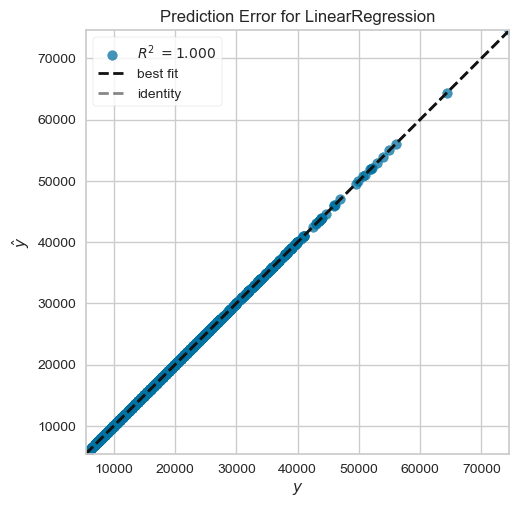

In [163]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# y ekseninde predictionlarımız, x ekseninde ise gerçek değerlerimiz yer alıyor. silik olan çizgi modelin tahmnilerinin
# mükemmel olduğu noktaları. koyu renki olan çizgi ise modelimizin eğitim sonrası çizdiğ best fit line temsil ediyor.
# koyu olan çizgi ile silik olan çizgi ne kadar birbirine yakın olursa modelin tahminleri o kdar iyi demektir.

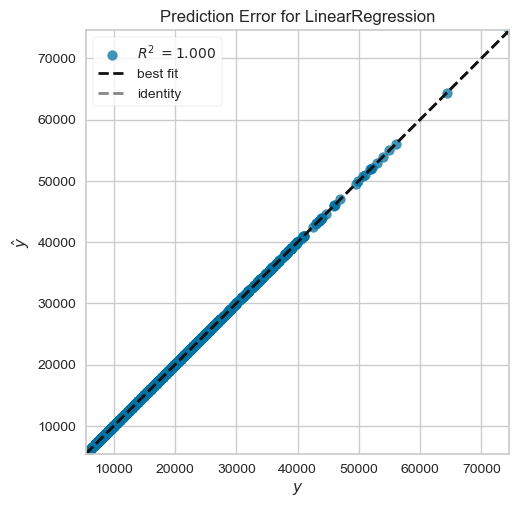

In [167]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train_scaled, y_train_pred)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_pred)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

In [173]:
residuals= y_test - y_pred

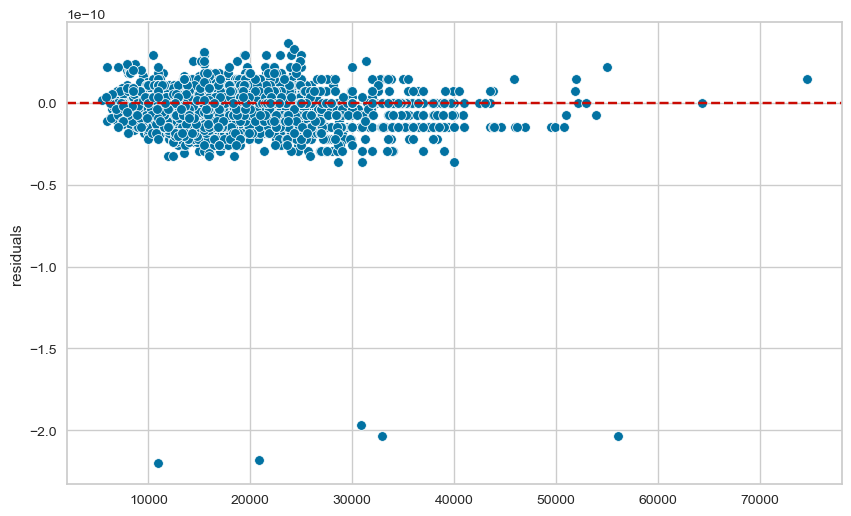

In [174]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show();

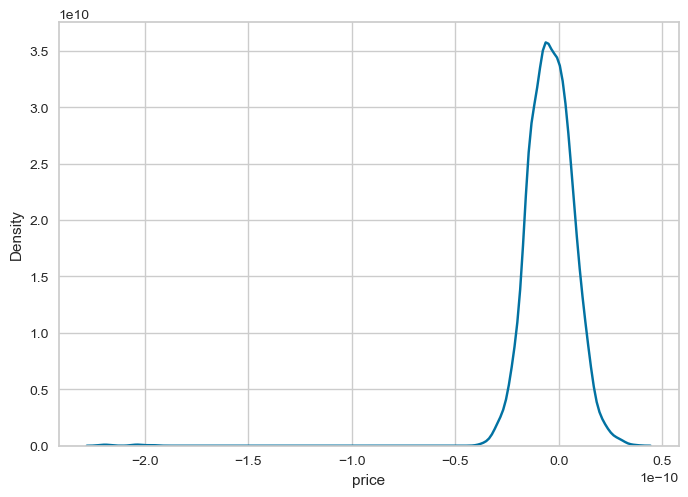

In [175]:
sns.kdeplot(residuals)
plt.show();

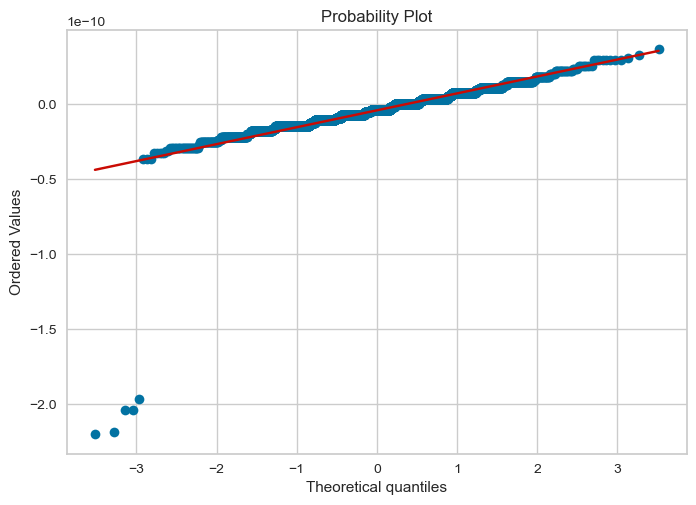

In [177]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt)
plt.show();

In [178]:
# skew değerleri üzerinden de yorum yapabiliriz. skew değeri -0.5 ile +0.5 arasında ise datanın normal dağılıma çok uygun 
# olduğunu, -1 ile +1 arasındaki değerlerin normal dağılıma uygun olduğunu,
# -1, +1 değerlerinden sonra yavaş yavaş normal dağılımın bozulmaya başladığını söyleyebiliriz.

from scipy.stats import skew
skew(residuals)

-5.816429006504658

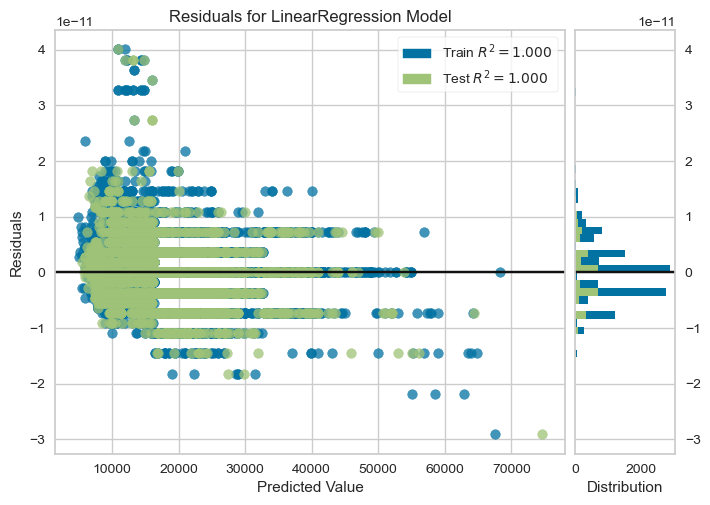

In [179]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

# son zamanlarda ML görselleştirmelerinde sıklıkla tercih edilen bir kütüphane
# residuallerin dağılımına hem train jem de test seti için bakabiliyoruz.

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [180]:
df

,make_model,body_type,price,km,Type,Fuel,Extras,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,CO2_Emission,Comfort_Convenience_Package,Entertainment_Media_Package,Safety_Security_Package
0,Audi A1,Sedans,15770,56013.000000,Used,Diesel,3,7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8,99.0,Premium,Plus,Safety Premium Package
1,Audi A1,Sedans,14500,80000.000000,Used,Benzine,4,7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6,129.0,Standard,Plus,Safety Premium Package
2,Audi A1,Sedans,14640,83450.000000,Used,Diesel,2,7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8,99.0,Premium,Standard,Safety Premium Package
3,Audi A1,Sedans,14500,73000.000000,Used,Diesel,3,6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8,99.0,Standard,Plus,Safety Premium Package
4,Audi A1,Sedans,16790,16200.000000,Used,Diesel,4,7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1,109.0,Premium,Plus,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15904,Renault Espace,Van,39950,1647.362609,New,Diesel,2,6.0,0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3,139.0,Premium,Plus,Safety Premium Package
15905,Renault Espace,Van,39885,9900.000000,Used,Benzine,3,7.0,0.0,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,front,7.4,168.0,Premium,Plus,Safety Premium Package
15906,Renault Espace,Van,39875,15.000000,Pre-registered,Diesel,1,6.0,0.0,1.0,146.0,1,Metallic,Part/Full Leather,Automatic,1997.0,1734.0,front,5.3,139.0,Standard,Plus,Safety Premium Package
15907,Renault Espace,Van,39700,10.000000,Pre-registered,Diesel,2,6.0,0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3,139.0,Standard,Plus,Safety Premium Package


In [ ]:
# Outlier degerlere sahip olabilecek columnslar

df.price
df.km
df.age
df.Previous_Owners
df.hp_kW
df.Displacement_cc
df.Weight_kg
df.cons_comb
df.CO2_Emission

<Axes: >

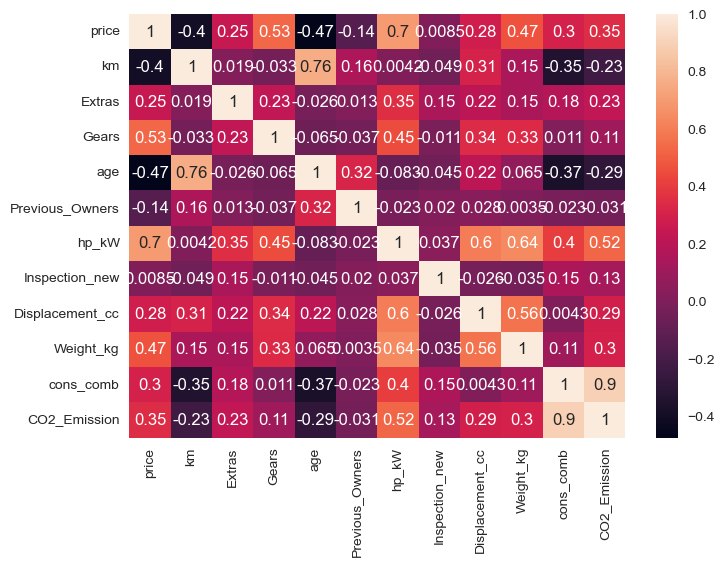

In [193]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df_numeric = pd.concat([df.price, df.km, df.age, df.Previous_Owners, df.hp_kW, df.Displacement_cc, df.Weight_kg, df.cons_comb, df.CO2_Emission], axis=1)

In [199]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            15909 non-null  int64  
 1   km               15909 non-null  float64
 2   age              15909 non-null  float64
 3   Previous_Owners  15909 non-null  float64
 4   hp_kW            15909 non-null  float64
 5   Displacement_cc  15909 non-null  float64
 6   Weight_kg        15909 non-null  float64
 7   cons_comb        15909 non-null  float64
 8   CO2_Emission     15909 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


<Axes: >

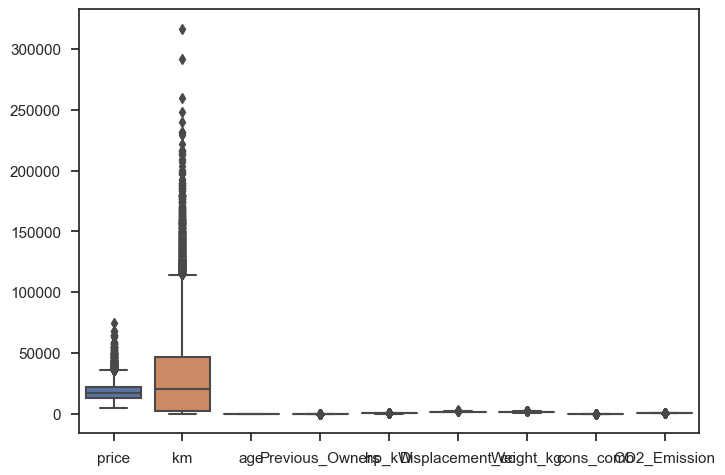

In [196]:
sns.boxplot(data=df_numeric)

In [198]:
df_numeric.describe()

,price,km,age,Previous_Owners,hp_kW,Displacement_cc,Weight_kg,cons_comb,CO2_Emission
count,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000,15909.000000
mean,18020.241876,32092.436526,1.389591,1.042869,88.493746,1428.657364,1337.675467,4.824329,117.783110
std,7377.200813,36982.838757,1.121355,0.339241,26.671943,275.852413,199.672043,0.887890,18.022786
min,4950.000000,0.000000,0.000000,0.000000,40.000000,890.000000,840.000000,3.000000,45.000000
25%,12850.000000,1913.000000,0.000000,1.000000,66.000000,1229.000000,1165.000000,4.000000,104.000000
50%,16900.000000,20410.000000,1.000000,1.000000,85.000000,1461.000000,1295.000000,4.800000,117.000000
75%,21900.000000,46900.000000,2.000000,1.000000,103.000000,1598.000000,1472.000000,5.400000,129.000000
max,74600.000000,317000.000000,3.000000,4.000000,294.000000,2967.000000,2471.000000,9.100000,253.000000


In [200]:
for col in df_numeric.columns:
    if df_numeric[col].dtype != 'object':
        pct_75 = df_numeric[col].describe()['75%']
        num_above_75pct = (df_numeric[col] > pct_75).sum()
        print(f"{col}: {num_above_75pct} values above 75th percentile")

price: 3966 values above 75th percentile
km: 3977 values above 75th percentile
age: 3677 values above 75th percentile
Previous_Owners: 1203 values above 75th percentile
hp_kW: 3726 values above 75th percentile
Displacement_cc: 1745 values above 75th percentile
Weight_kg: 3954 values above 75th percentile
cons_comb: 3700 values above 75th percentile
CO2_Emission: 3676 values above 75th percentile


In [201]:
for col in df_numeric.columns:
    if df_numeric[col].dtype != 'object':
        pct_25 = df_numeric[col].describe()['25%']
        num_below_25pct = (df_numeric[col] < pct_25).sum()
        print(f"{col}: {num_below_25pct} values below 25th percentile")

price: 3968 values below 25th percentile
km: 3977 values below 25th percentile
age: 0 values below 25th percentile
Previous_Owners: 554 values below 25th percentile
hp_kW: 2065 values below 25th percentile
Displacement_cc: 3641 values below 25th percentile
Weight_kg: 3925 values below 25th percentile
cons_comb: 3184 values below 25th percentile
CO2_Emission: 3608 values below 25th percentile


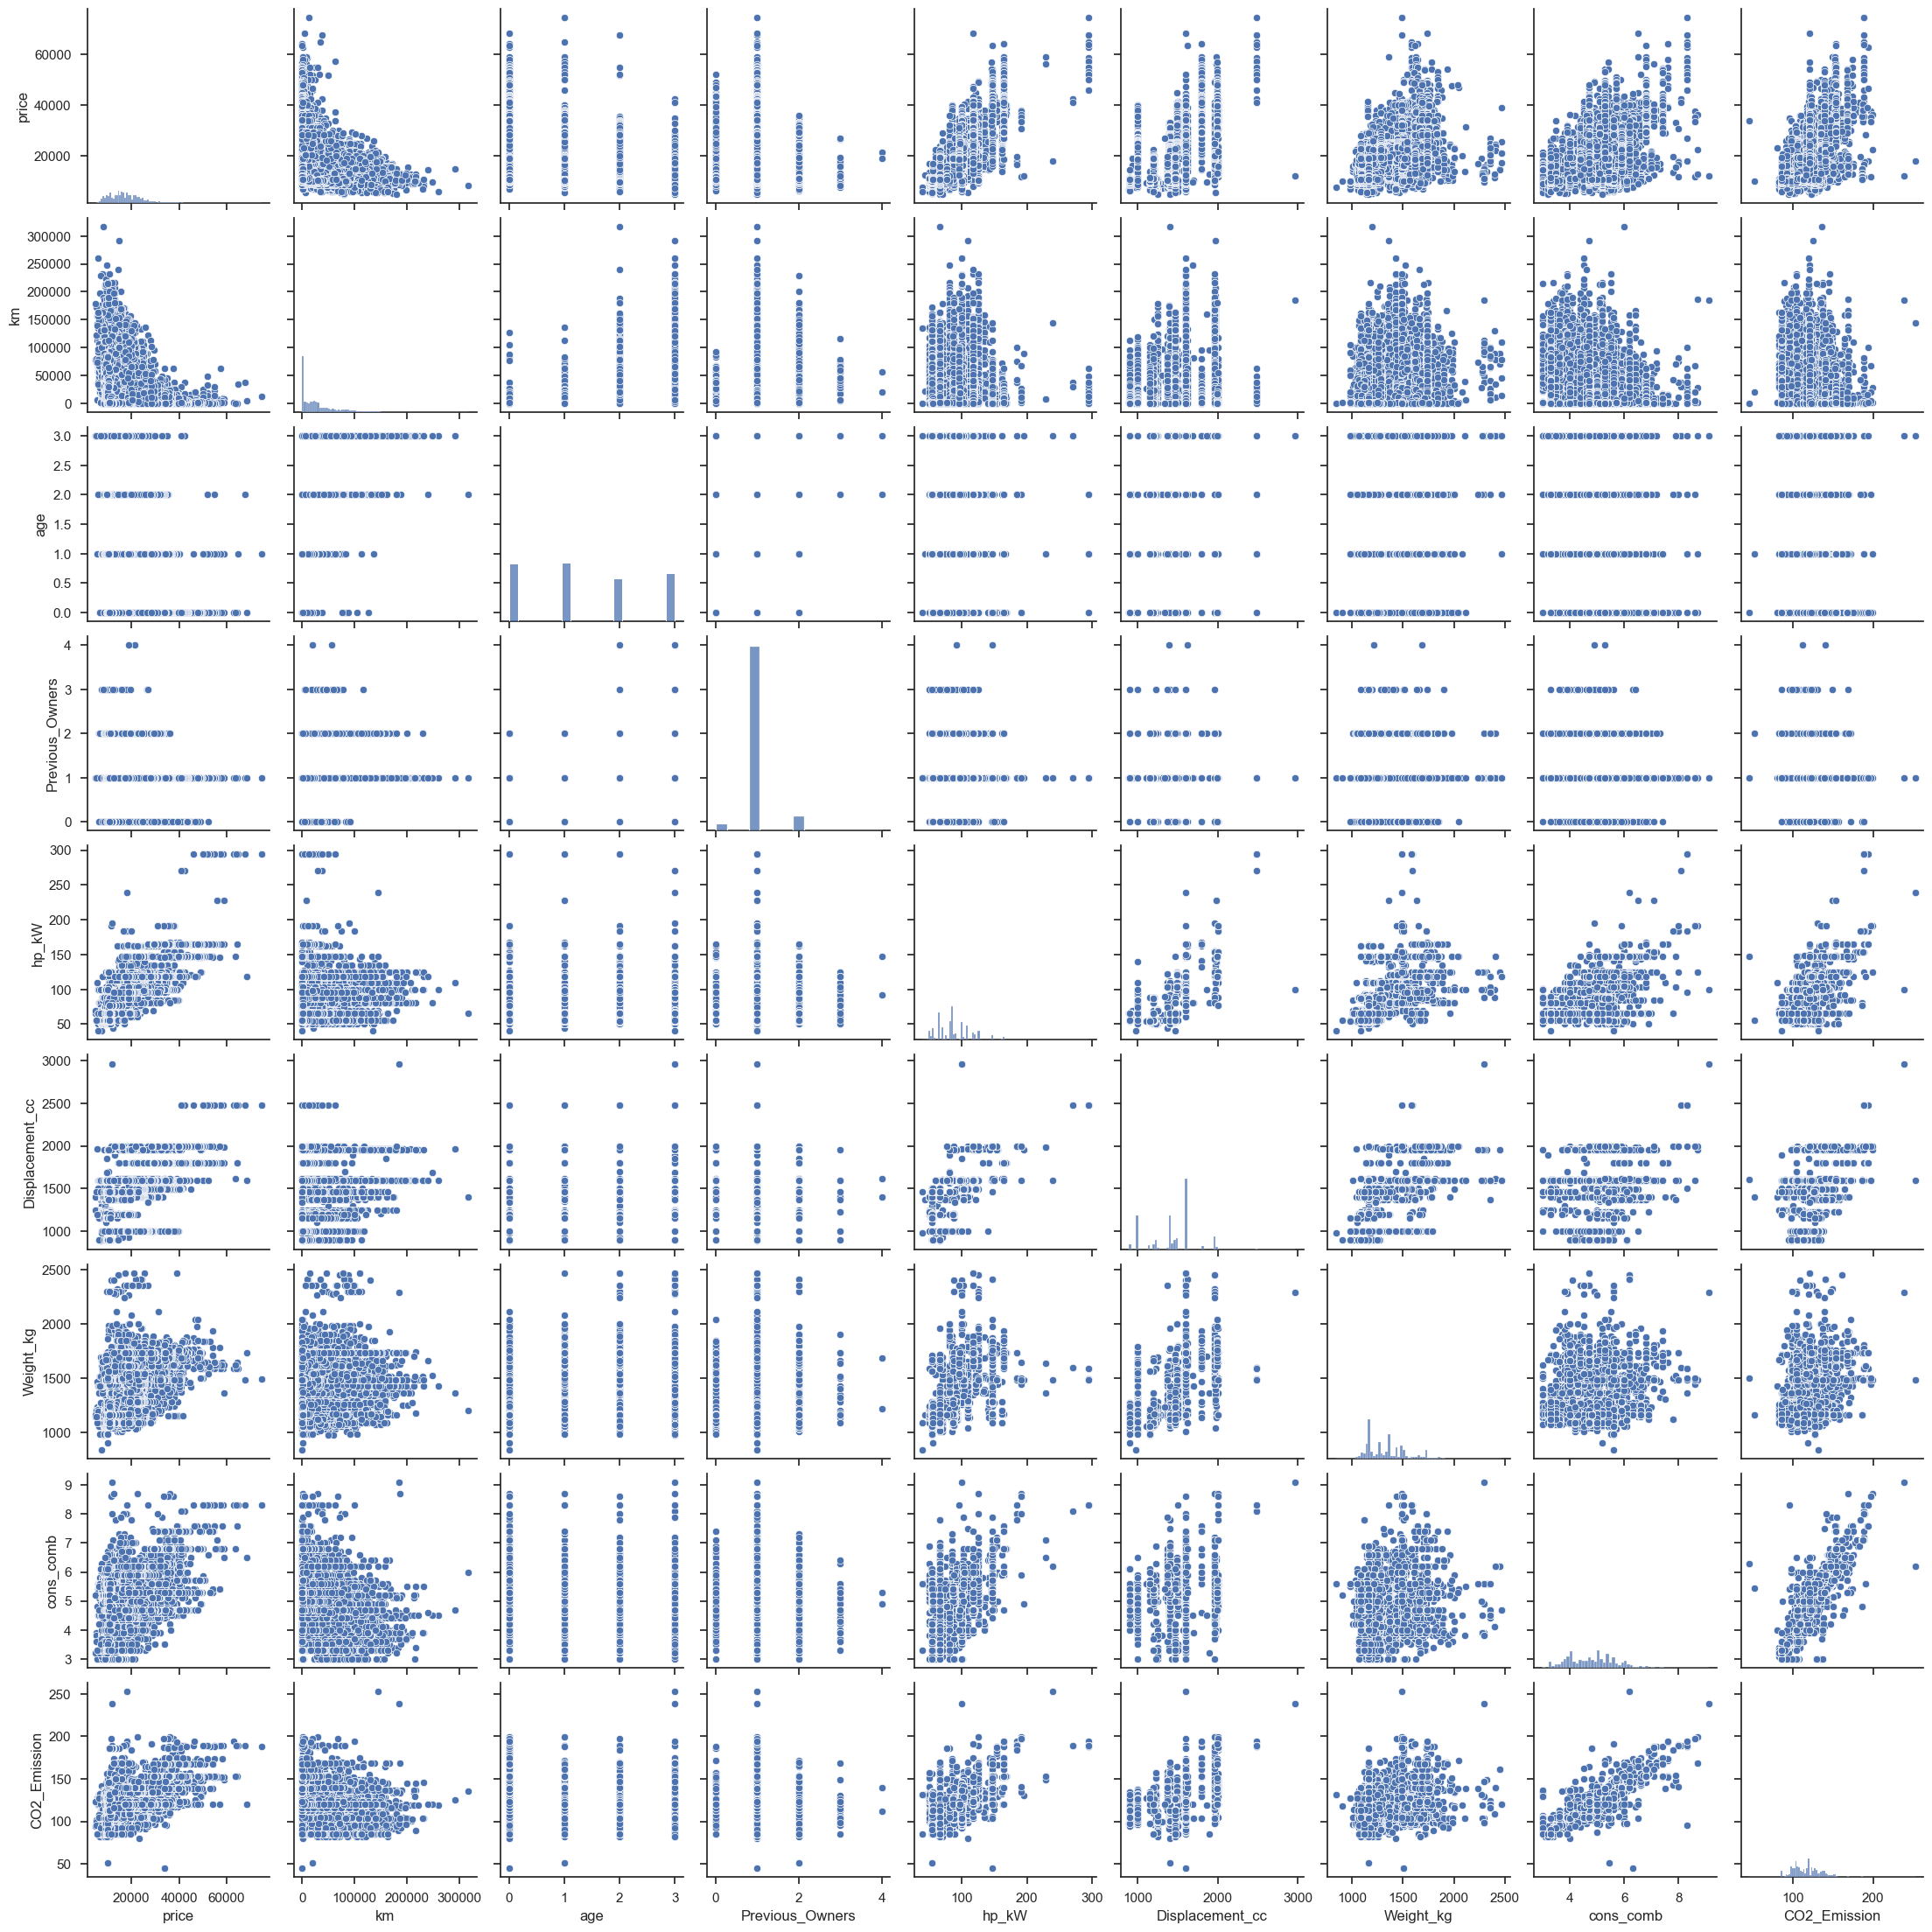

In [194]:
sns.set(style="ticks")
sns.pairplot(df, vars=["price", "km", "age", "Previous_Owners", "hp_kW", "Displacement_cc", "Weight_kg", "cons_comb", "CO2_Emission"])

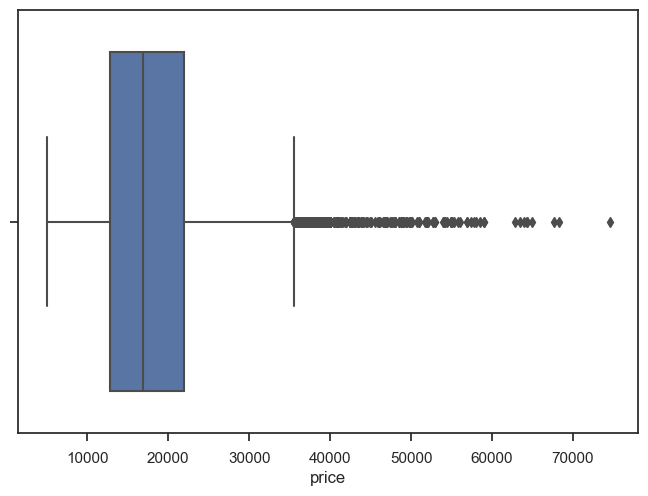

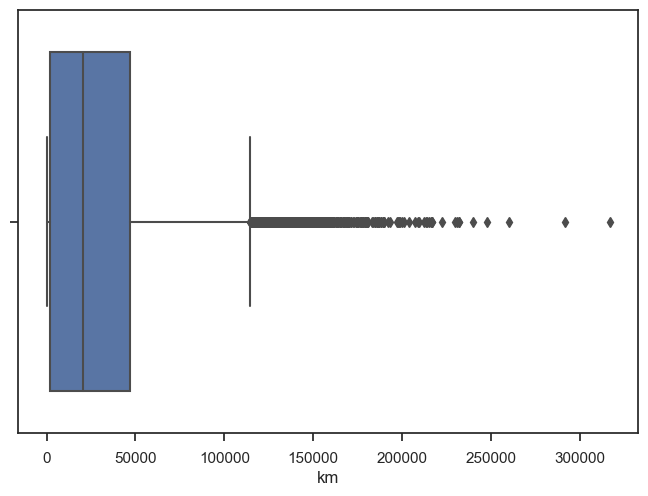

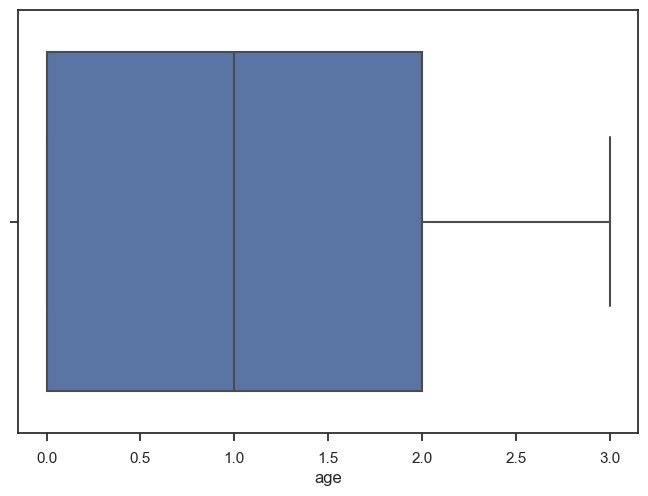

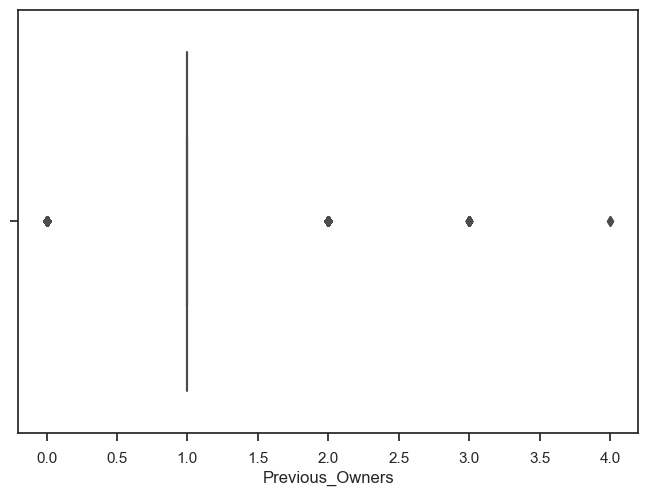

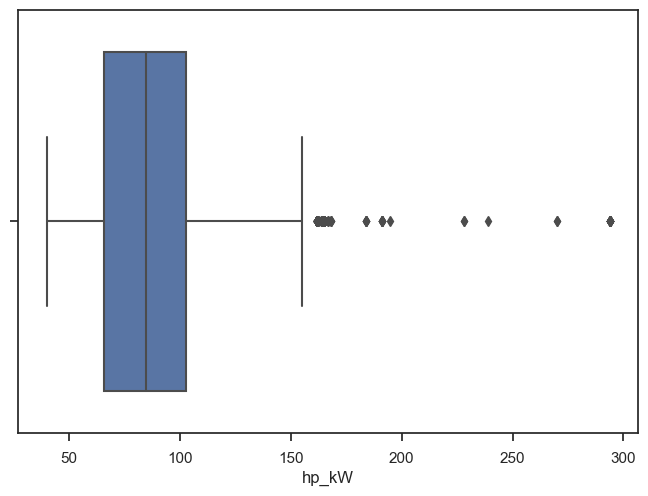

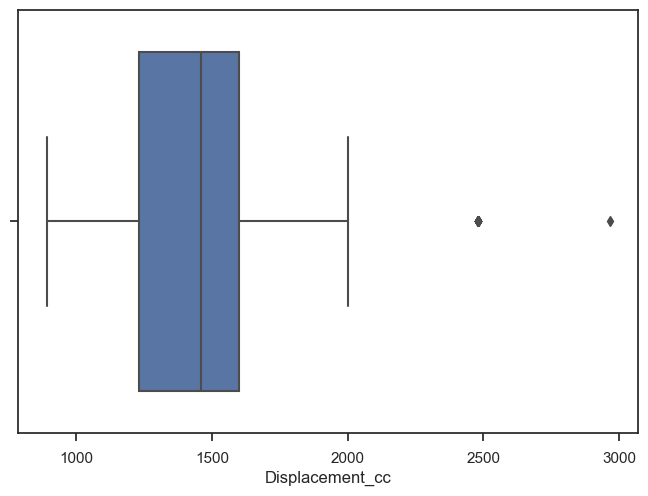

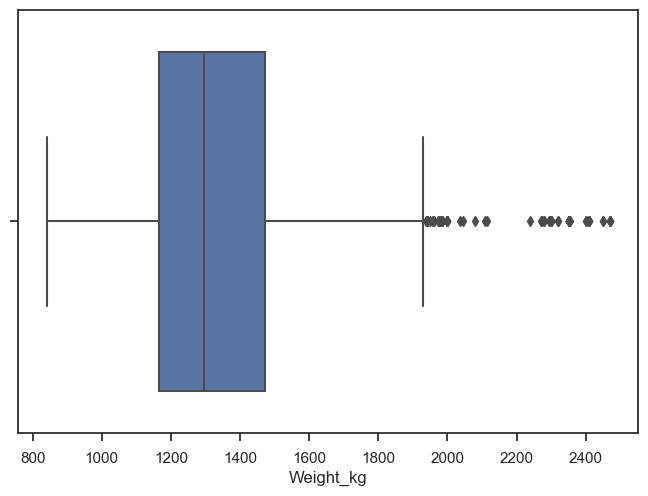

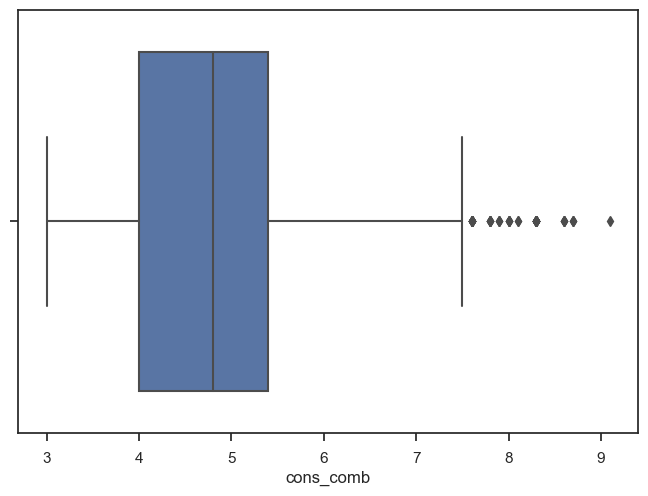

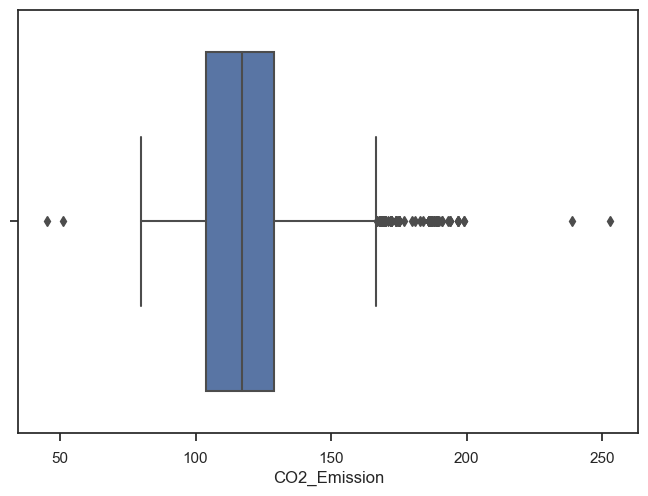

In [197]:
for col in ['price', 'km', 'age', 'Previous_Owners', 'hp_kW', 'Displacement_cc', 'Weight_kg', 'cons_comb', 'CO2_Emission']:
    sns.boxplot(x=col, data=df)
    plt.show()

## Pipeline
- Read the documentation and apply pipeline 
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___